In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyvander as poly

(0, 10)

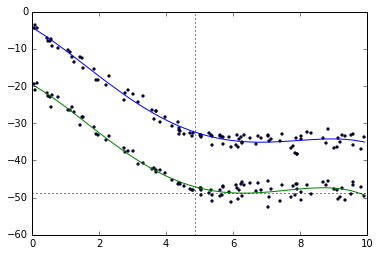

In [60]:
norder = 4
nsim = 10
nbasepoints = 100

discount = 0.6
C, beta, xmax = -30, 2, 10
keep_action, replace_action = 0, 1

weights = np.zeros((norder+1,))

rng = np.random.RandomState(1234)
basepoints = rng.uniform(0, 10, nbasepoints)
rewards_keep = -4.*basepoints
reward_replace = C

for i in range(40):
    next_states_keep = rng.exponential(beta, (nbasepoints, nsim)) + basepoints[:,np.newaxis]
    overbound_states = (next_states_keep > xmax)
    next_states_keep[overbound_states] = rng.exponential(beta, np.sum(overbound_states))
    v_keep = np.mean(rewards_keep[:, np.newaxis] + discount*np.dot(poly(next_states_keep, deg=norder), weights), axis=1)

    next_state_replace = rng.exponential(beta, (nbasepoints, nsim))
    v_replace = np.mean(reward_replace + discount*np.dot(poly(next_state_replace, deg=norder), weights), axis=1)
    vhat = np.max(np.column_stack((v_keep, v_replace)), axis=1)
    qhat = np.argmax(np.column_stack((v_keep, v_replace)), axis=1)

    weights = np.linalg.lstsq(poly(basepoints, deg=norder), vhat)[0]
    indices = np.argsort(basepoints)
    if i == 1 or i == 19:
        plt.plot(basepoints[indices], np.dot(poly(basepoints, deg=norder), weights)[indices])
        plt.scatter(basepoints, vhat, marker='.')
    
plt.axvline(4.867, linestyle='dotted', c='k')    
plt.axhline(-48.67, linestyle='dotted', c='k') 
plt.xlim(0, 10)
#plt.ylim(0, 10)
#plt.savefig('inventory.pdf')

In [61]:
qhat[indices]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])